In [3]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import time

import matplotlib.pyplot as plt

# Check image

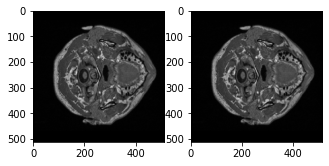

In [28]:
DATA_PATH = r"dataset\MRI_T1T2T2F_ROI"

image = cv2.imread(os.path.join(DATA_PATH,os.listdir(DATA_PATH)[1]),cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, dsize=(512, 512), interpolation=cv2.INTER_NEAREST)

image = np.array(image)
np.save("test",image)

plt.figure(figsize=(8,30))

image_file = np.load(r"test.npy")
plt.subplot(3,3,1)
plt.imshow(image_file,cmap='gray')

image = np.clip(image_file,0,255)
plt.subplot(3,3,2)
plt.imshow(image,cmap='gray')


In [6]:
def pngToNumpy(dir_path : str, output_path : str):
    FILES = os.listdir(dir_path)
    images = []

    try:
        for img in tqdm(FILES, desc="png to inumpy", mininterval=0.02):
            img_path = os.path.join(dir_path,img)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, dsize=(512, 512), interpolation=cv2.INTER_NEAREST)
            cv2.imshow("image",image)
            break
            images.append(image)
    except Exception as e:
        print(e, img)

    # numpy array로 변환 후 저장
    images = np.array(images)
    np.save(output_path, images)

## T1W image load

In [7]:
# T1W 이미지들 load
T1W_PATH = r'dataset\T1W_brain_pic'
OUTPUT_PATH = r'dataset\numpy\T1W_images.npy'

pngToNumpy(dir_path = T1W_PATH, output_path = OUTPUT_PATH)

png to inumpy:   0%|          | 0/1084 [00:00<?, ?it/s]


## T2F image load

In [8]:
# T2F 이미지들 load
T2F_PATH = r'dataset\T2F_brain_pic'
OUTPUT_PATH = r"dataset\numpy\T2F_images.npy"

pngToNumpy(dir_path = T2F_PATH, output_path = OUTPUT_PATH)

png to inumpy:   0%|          | 0/1084 [00:00<?, ?it/s]


## T2W image load

In [9]:
# T2W 이미지들 load
T2W_PATH = r'dataset\T2W_brain_pic'
OUTPUT_PATH = r"dataset\numpy\T2W_images.npy"

pngToNumpy(dir_path = T2W_PATH, output_path = OUTPUT_PATH)

png to inumpy:   0%|          | 0/1084 [00:00<?, ?it/s]


## Mask image load

In [10]:
# mask 이미지들 load
MASK_PATH = r'dataset\Mask_brain_pic'
OUTPUT_PATH = r"dataset\numpy\Mask_images.npy"

pngToNumpy(dir_path = MASK_PATH, output_path = OUTPUT_PATH)

png to inumpy:   0%|          | 0/1084 [00:00<?, ?it/s]
